In [1]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

working_dir = os.getcwd()
working_dir

'd:\\Project\\OpenCV'

85.0


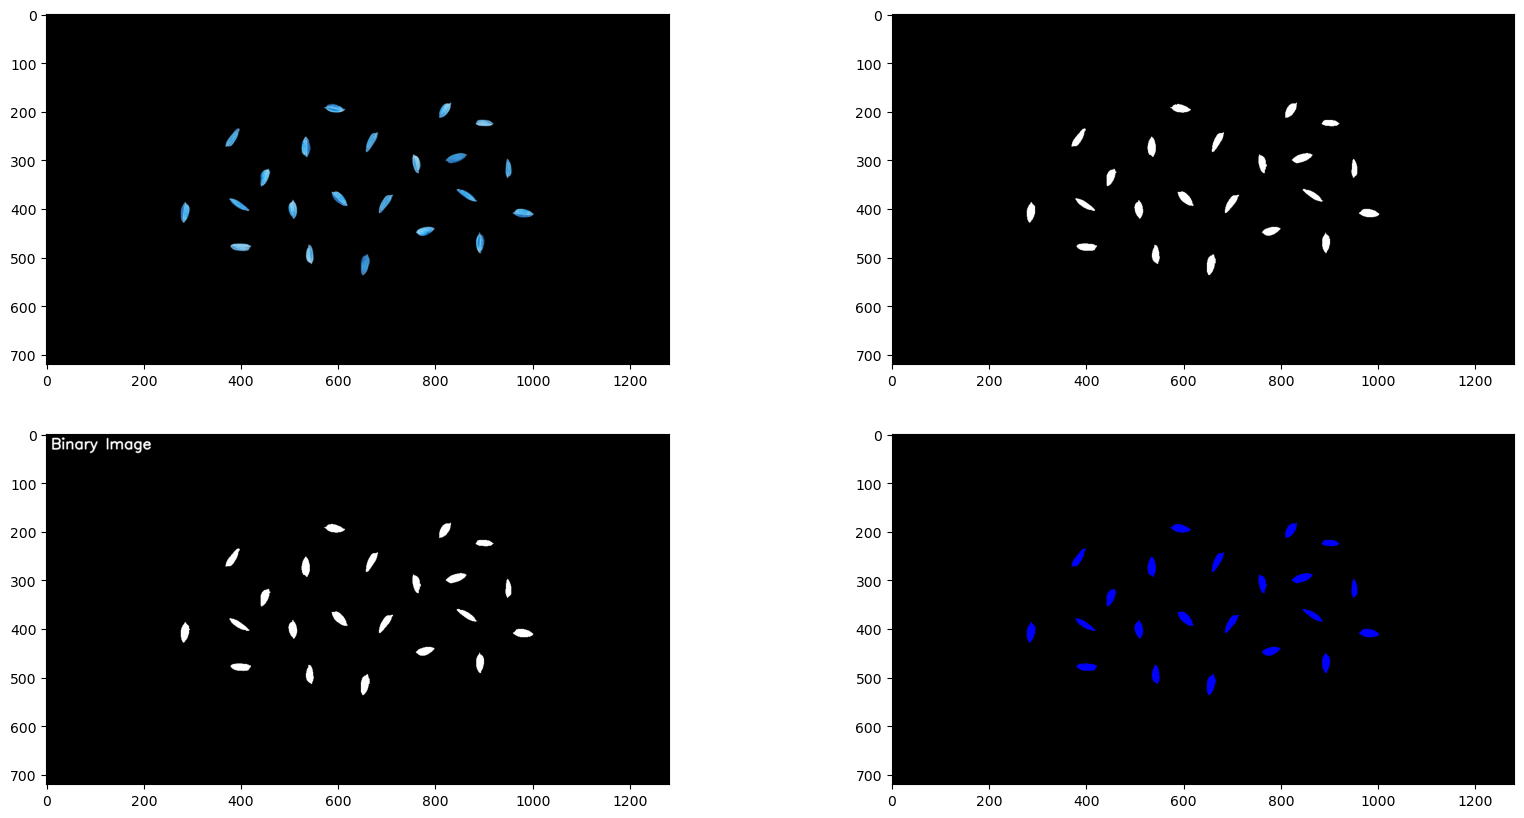

In [2]:
image = cv.imread('image/seed.png', cv.IMREAD_UNCHANGED)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, binary = cv.threshold(gray, 90, 255, cv.THRESH_BINARY)
ret, auto_binary = cv.threshold(gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

white_pixles = np.argwhere(auto_binary > 0)
red_binary = auto_binary.copy()
red_binary = cv.cvtColor(red_binary, cv.COLOR_GRAY2BGR)
for y, x in white_pixles:
    red_binary[y, x] = [0, 0, 255]

cv.putText(auto_binary, f"Binary Image", (10, 30),
            cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
cv.imwrite(f"image/seed_binary.jpg",auto_binary)
cv.imwrite(f"image/seed_shape_analysis.jpg",red_binary)

print(ret)

plt.figure(figsize=(20, 10))
plt.subplot(221); plt.imshow(image)
plt.subplot(222); plt.imshow(binary, cmap='gray')
plt.subplot(223); plt.imshow(auto_binary, cmap='gray')
plt.subplot(224); plt.imshow(red_binary)

plt.show()

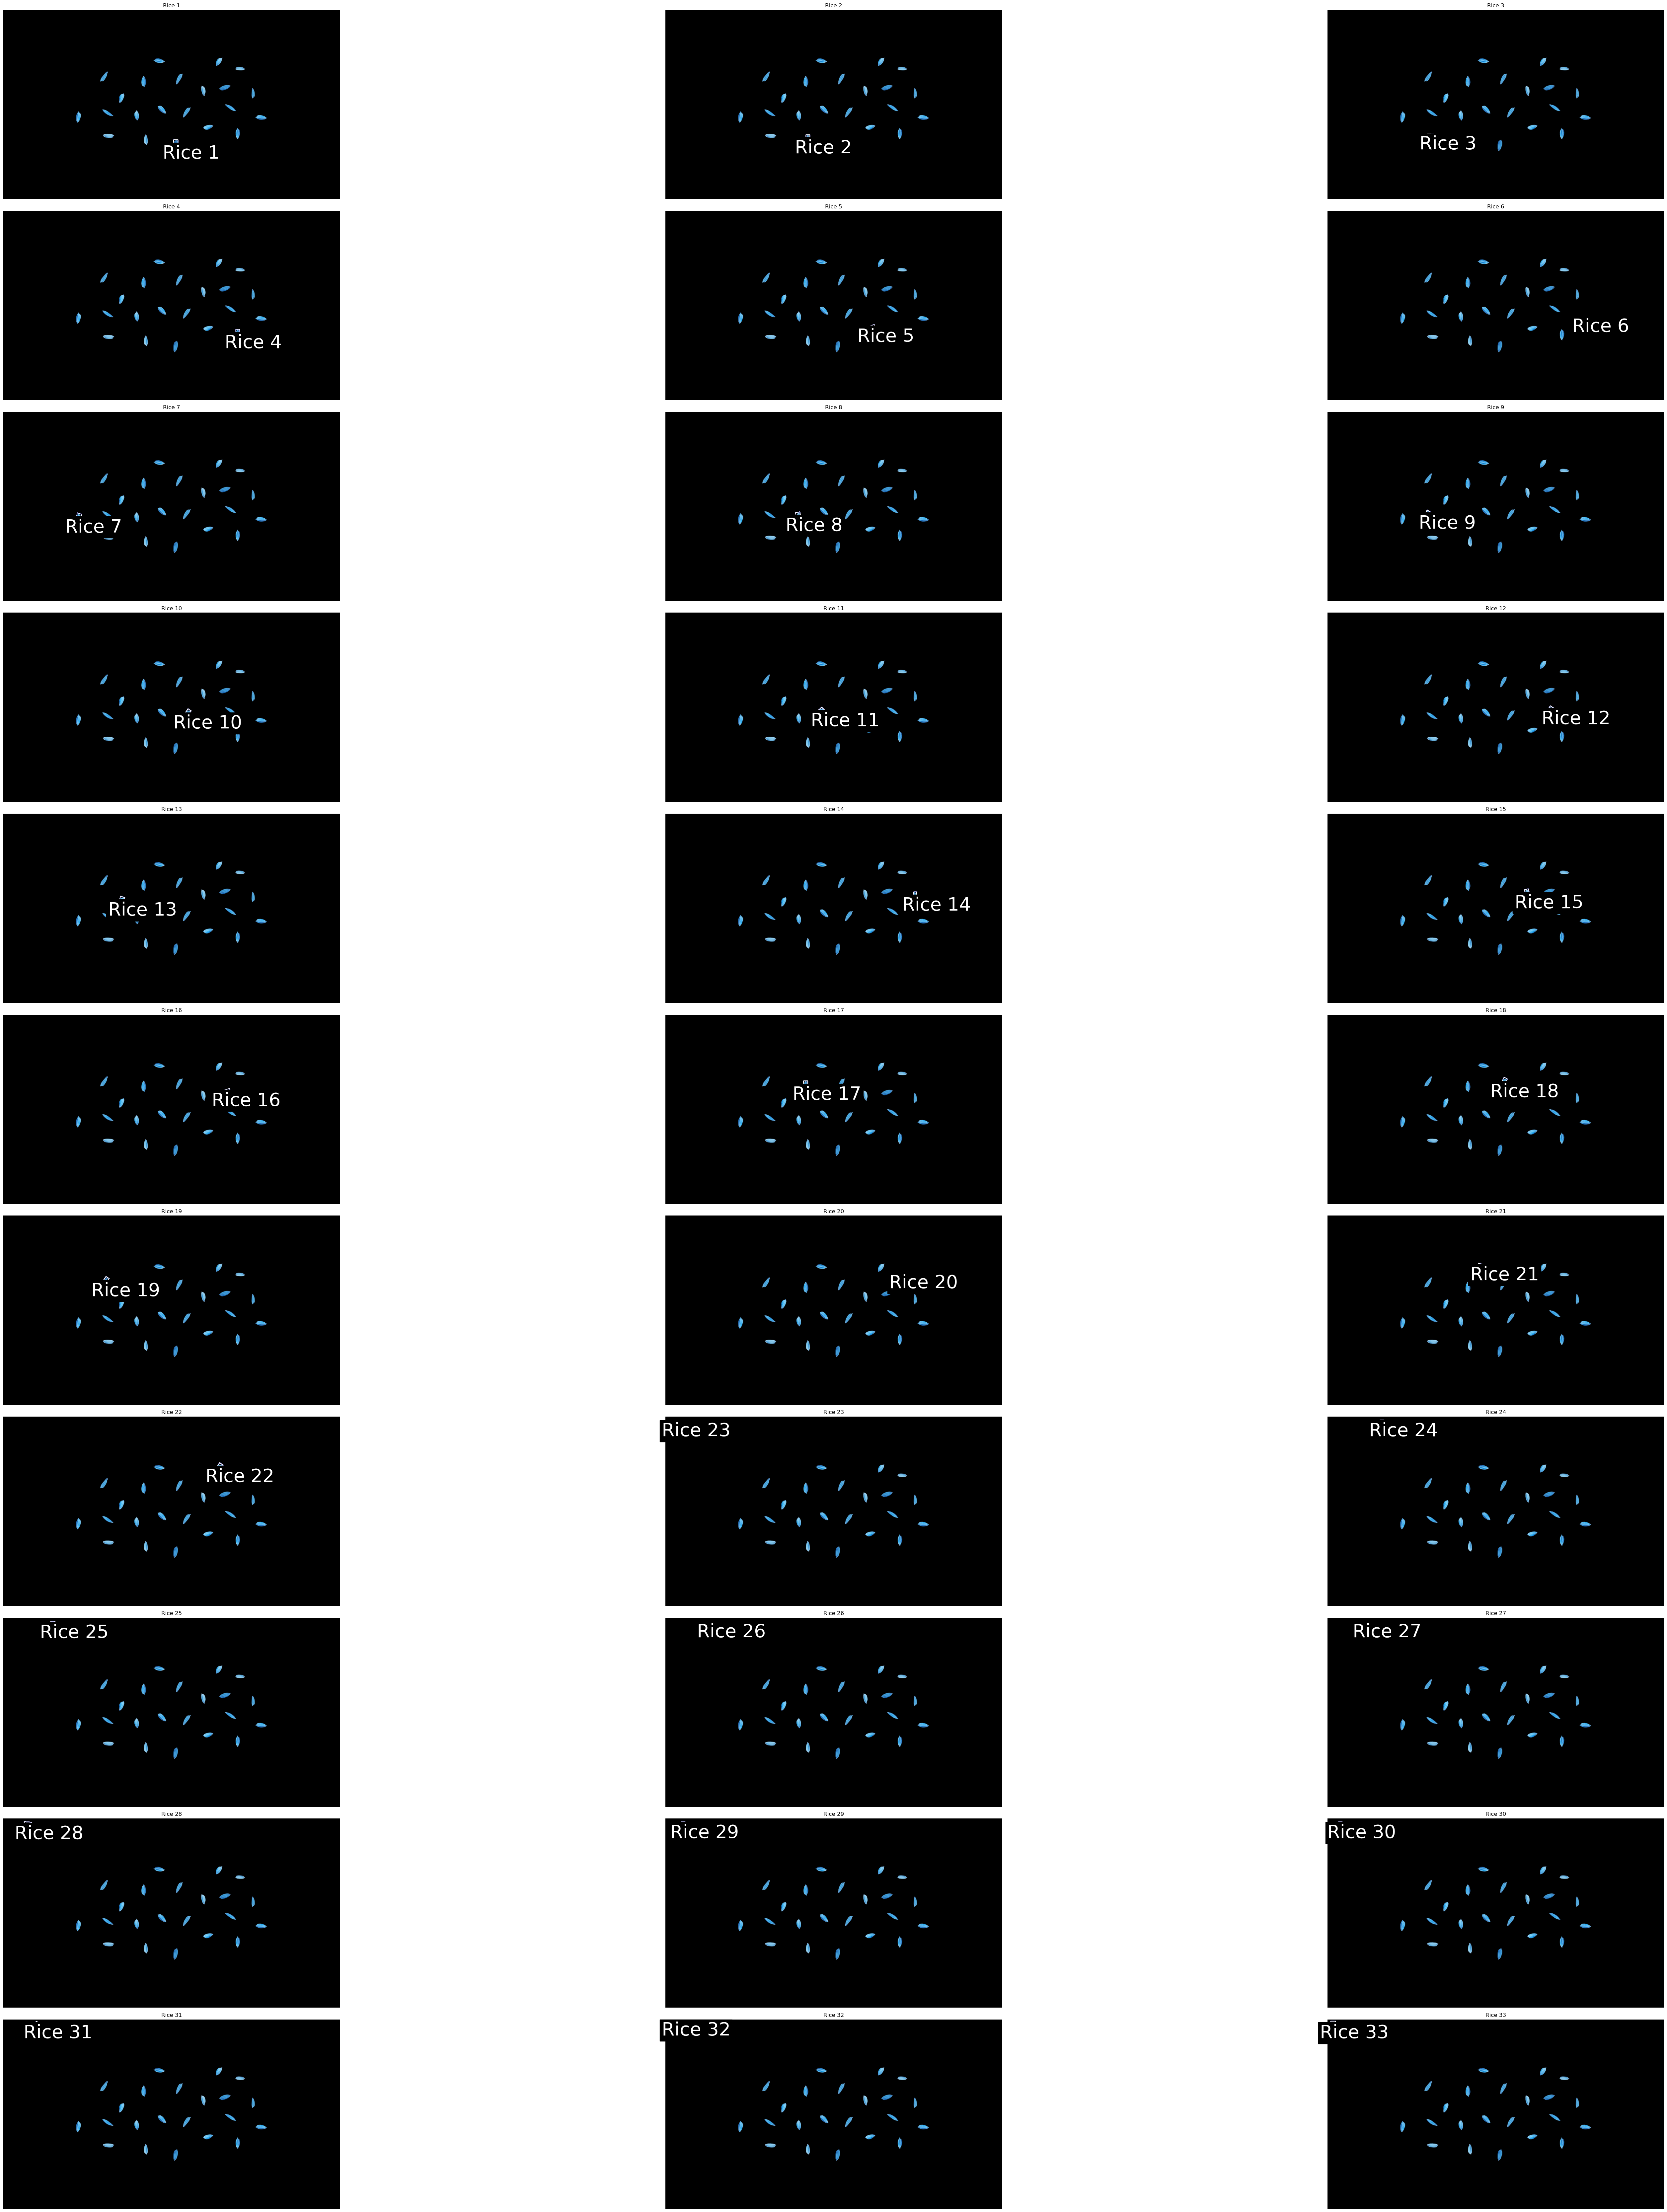

In [3]:
contours, _ = cv.findContours(auto_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

num_rows = len(contours)
num_cols = 3
plt.figure(figsize=(60, 200))

for i, contour in enumerate(contours, start=1):
    perimeter = cv.arcLength(contour, closed=True)
    area = cv.contourArea(contour)
    rect = cv.minAreaRect(contour)

    box = cv.boxPoints(rect)
    box = np.int0(box) # int로 변환

    image_with_box = image.copy()
    cv.drawContours(image_with_box, [box], 0, (0, 0, 255), 2)

    x, y = rect[0]  # 중심 좌표
    cv.putText(image_with_box, f"Rice {i}", (int(x) - 50, int(y) + 50),
                cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
    cv.imwrite(f"image/seed_rect_{i}.jpg", image_with_box)


    plt.subplot(num_rows, num_cols, i)
    plt.imshow(image_with_box)
    plt.title(f"Rice {i}")
    plt.axis('off')


    plt.text(x-50, y+50, f"Rice {i}", color='white', fontsize=40, backgroundcolor='black')

plt.tight_layout()
plt.show()

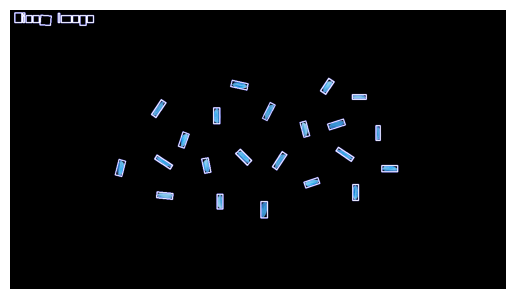

In [4]:
contours, _ = cv.findContours(auto_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_with_contours = image.copy()
for i, contour in enumerate(contours):
    rect = cv.minAreaRect(contour)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(image_with_contours, [box], 0, (0, 0, 255), 2)

cv.imwrite(f"image/seed_rect_all.jpg", image_with_contours)

plt.imshow(image_with_contours)
plt.axis('off')
plt.show()

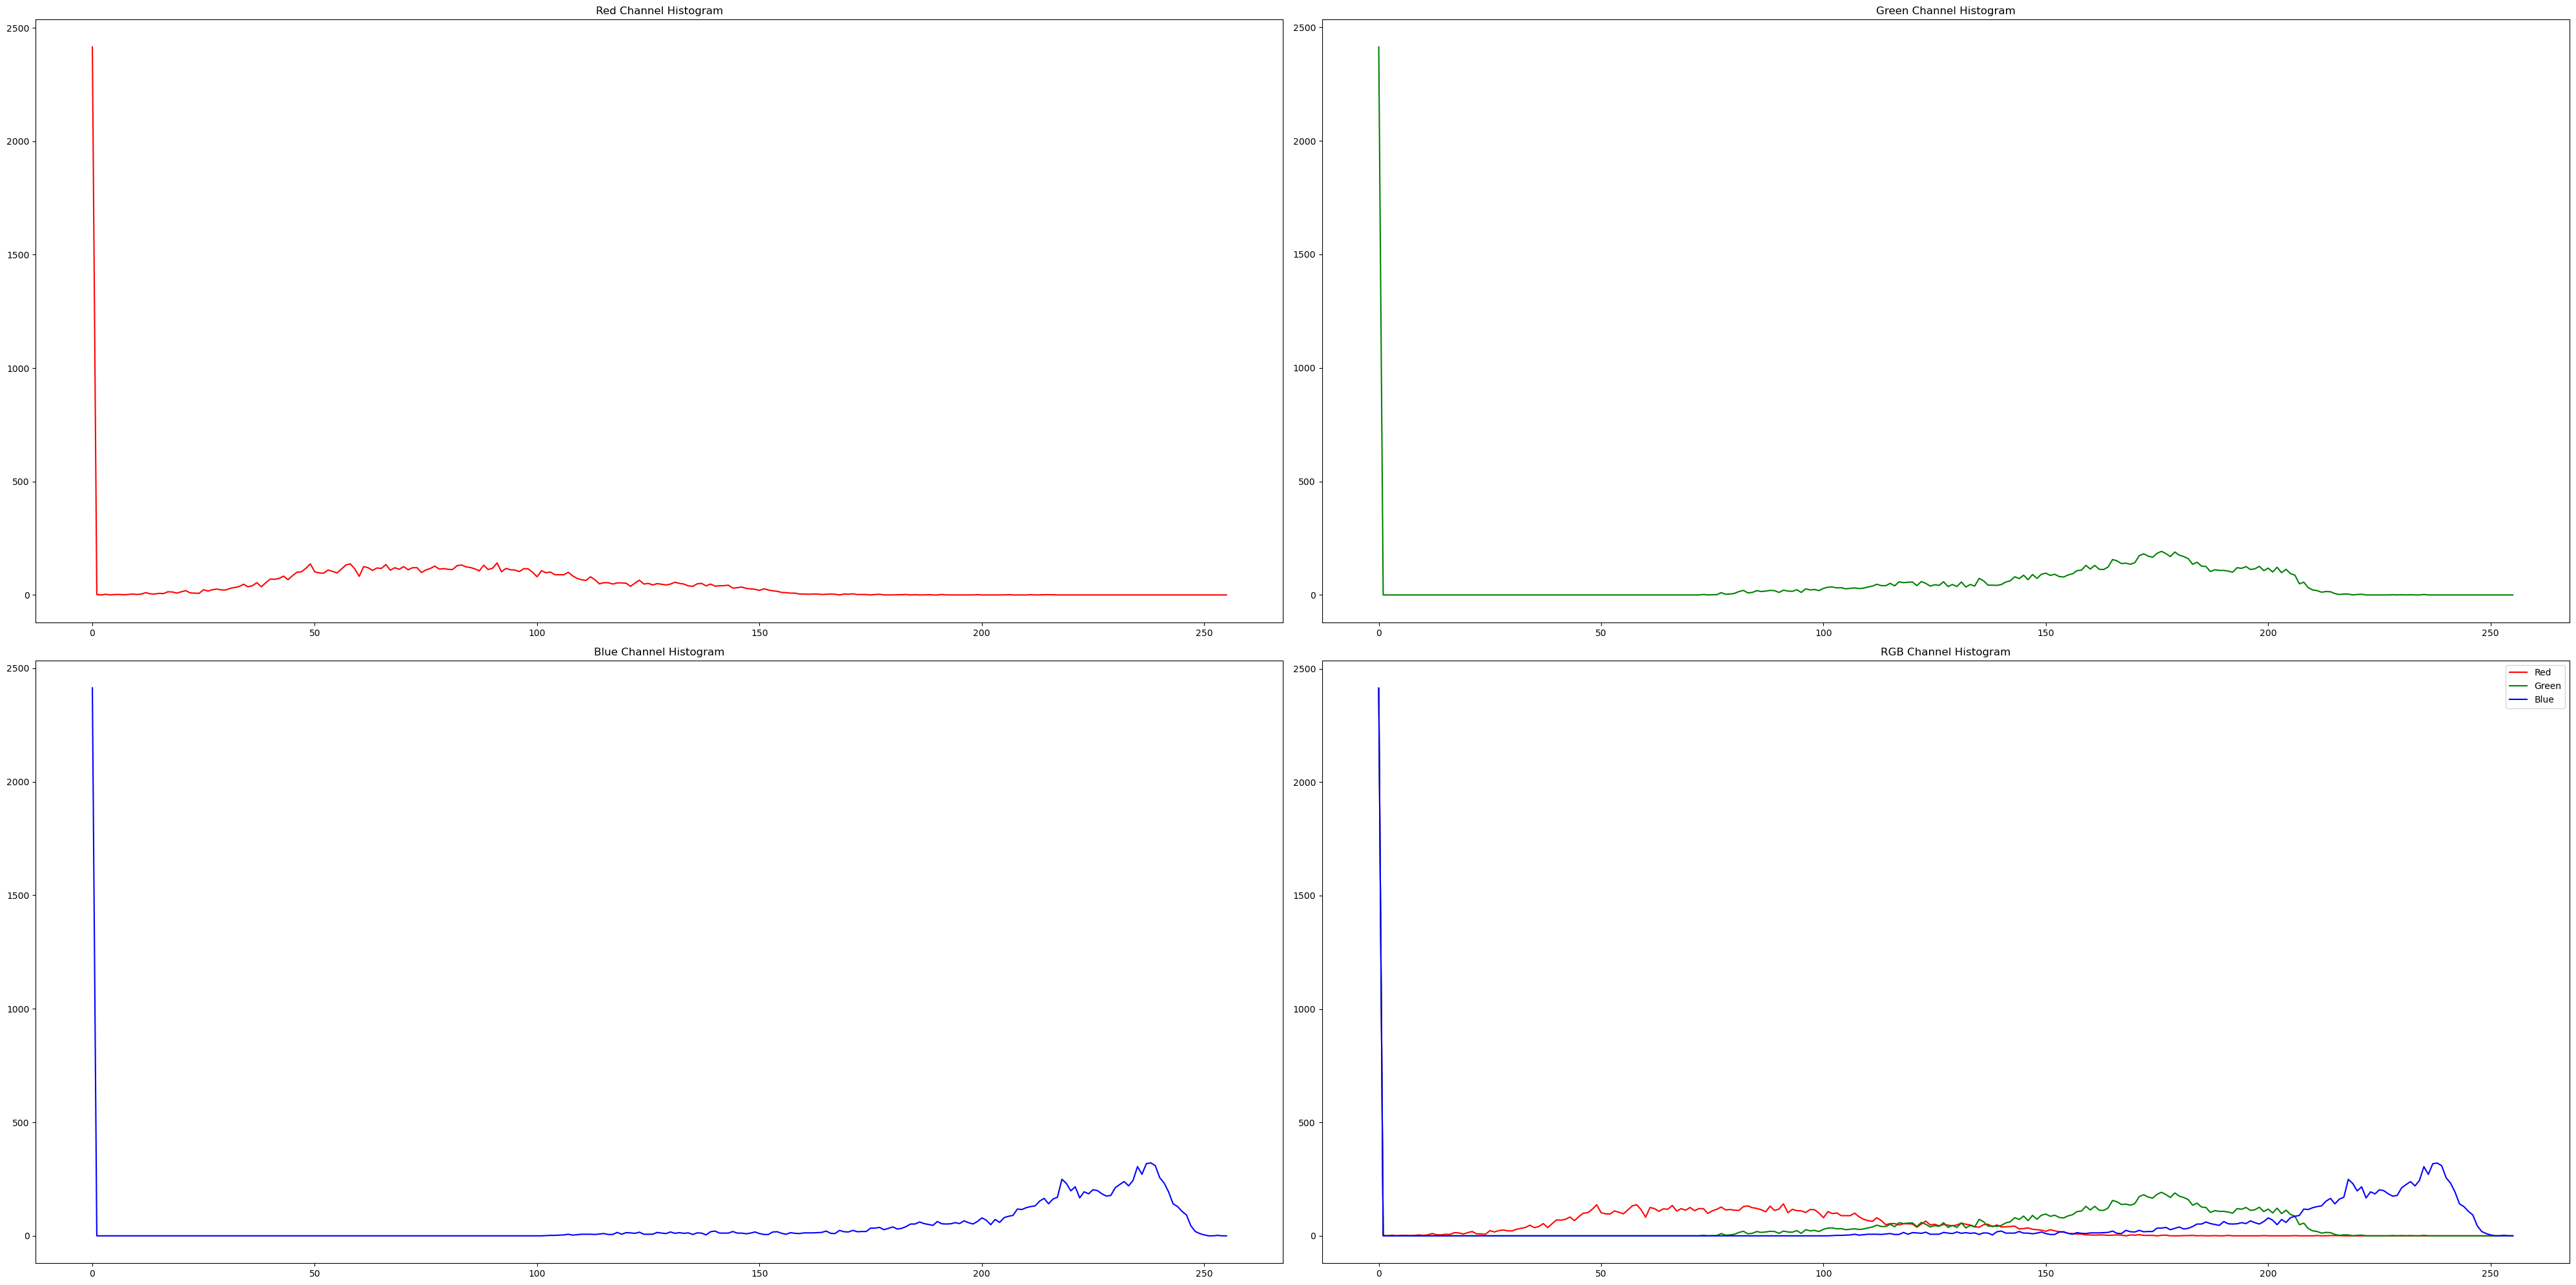

In [5]:
white_pixles = np.argwhere(auto_binary > 0)
color = [image[y, x, ::-1] for y, x in white_pixles]
color_rgb = [tuple(reversed(color)) for color in color]

histogram_r = np.histogram([color[0] for color in color_rgb], bins=256, range=(0, 256))
histogram_g = np.histogram([color[1] for color in color_rgb], bins=256, range=(0, 256))
histogram_b = np.histogram([color[2] for color in color_rgb], bins=256, range=(0, 256))

plt.figure(figsize=(40, 20))
plt.subplot(2, 2, 1)
plt.plot(histogram_r[1][:-1], histogram_r[0], color='red')
plt.title('Red Channel Histogram')

plt.subplot(2, 2, 2)
plt.plot(histogram_g[1][:-1], histogram_g[0], color='green')
plt.title('Green Channel Histogram')

plt.subplot(2, 2, 3)
plt.plot(histogram_b[1][:-1], histogram_b[0], color='blue')
plt.title('Blue Channel Histogram')

plt.subplot(2, 2, 4)
plt.plot(histogram_r[1][:-1], histogram_r[0], color='red', label='Red')
plt.plot(histogram_g[1][:-1], histogram_g[0], color='green', label='Green')
plt.plot(histogram_b[1][:-1], histogram_b[0], color='blue', label='Blue')
plt.legend()
plt.title('RGB Channel Histogram')

plt.tight_layout()

plt.savefig('image/seed_color.jpg', bbox_inches='tight')

plt.show()